In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/bavan/Downloads/last/sentiment_analysis_flipkart_reviews.csv')
df.head()

,UniqueID,Product ID,Product Name,Reviews Text,Rating Stars,Sentiment_Score,Sentiment
0,1,MOBGVTA2836DQWTT,"SAMSUNG Galaxy S23 FE (Graphite, 128 GB) (8 G...",The camera is next level But I'm facing some m...,4,0.03125,Positive
1,2,MOBGVTA2836DQWTT,"SAMSUNG Galaxy S23 FE (Graphite, 128 GB) (8 G...",Camera quality is amazing,5,0.60000,Positive
2,3,MOBGVTA2836DQWTT,"SAMSUNG Galaxy S23 FE (Graphite, 128 GB) (8 G...",Awesome photography like apple must buy don't ...,5,0.21250,Positive
3,4,MOBGVTA2836DQWTT,"SAMSUNG Galaxy S23 FE (Graphite, 128 GB) (8 G...",Camera and display is superb But bettary is a...,4,1.00000,Positive
4,5,MOBGVTA2836DQWTT,"SAMSUNG Galaxy S23 FE (Graphite, 128 GB) (8 G...",Awesome phone,5,1.00000,Positive


In [10]:
print(df.columns)


Index(['UniqueID', 'Product ID', 'Product Name', 'Reviews Text',
       'Rating Stars ', 'Sentiment_Score', 'Sentiment'],
      dtype='object')


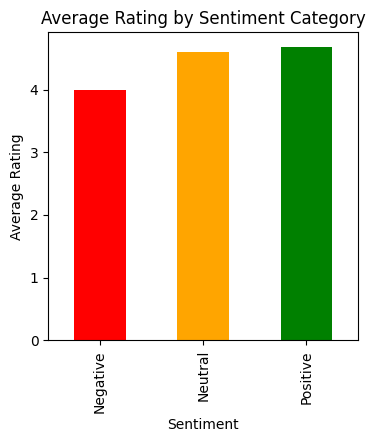

In [14]:
# Calculate the average rating for each sentiment category
avg_rating_by_sentiment = df.groupby('Sentiment')['Rating Stars '].mean()

# Plot the average ratings by sentiment
plt.figure(figsize=(4, 4))
avg_rating_by_sentiment.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Average Rating by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()


In [17]:
import	plotly.express	as	px
fig = px.scatter(df, x='Product Name', y='Sentiment_Score', color='Sentiment', size='Rating Stars ', size_max=30, hover_name='Product Name')
fig.update_layout(width=1000, height=1000)
fig.update_layout(title_text='Scatter Plot of Product Name vs. Sentiment Score (colored by Sentiment)')
fig.show()


In [18]:
import plotly.express as px

# Create the histogram
fig = px.histogram(df, x='Rating Stars ', height=500, width=900, template='simple_white',
                   color='Sentiment',  # using 'Sentiment' instead of 'sex'
                   color_discrete_sequence=['purple', 'pink', 'green'])  # Colors for different sentiments

# Customize the layout
fig.update_layout(title={'text': 'Histogram of Ratings by Sentiment', 'font': {'size': 25}},
                  title_font_family="Times New Roman",
                  title_font_color="darkgrey",
                  title_x=0.2)

fig.update_layout(font_family='Times New Roman',
                  font_color='grey',
                  yaxis_title={'text': "Count", 'font': {'size': 18}},
                  xaxis_title={'text': "Rating Stars", 'font': {'size': 18}})

# Show the plot
fig.show()


In [19]:
from plotly.offline import iplot
import plotly.express as px

# Get the value counts for the 'Sentiment' column
category = df["Sentiment"].value_counts()

# Create a bar plot for the sentiment category frequency in percentage
fig = px.bar(category, 
             x=category.index,  # Sentiment categories (e.g., Positive, Negative)
             y=(category / sum(category)) * 100,  # Percentage
             color=category.index,  # Color by sentiment category
             labels={"y": "Frequency in (Percentage%)", "category": "Category"},
             title="Frequency of Sentiment Category in Percentage",
             text=category.apply(lambda x: f'{(x / sum(category)) * 100:.1f}%'),
             template="plotly_dark"
            )

# Customize the layout
fig.update_layout(showlegend=False)

# Customize the font for the text labels
fig.update_traces(
    textfont={
        "family": "consolas",
        "size": 20,        
    }
)

# Display the plot
iplot(fig)
